10 ensemble


In [1]:
from SPV_utils import *

../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_1.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_2.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_3.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_4.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_5.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_6.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_7.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_8.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_9.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_10.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_11.npy
94 14.0


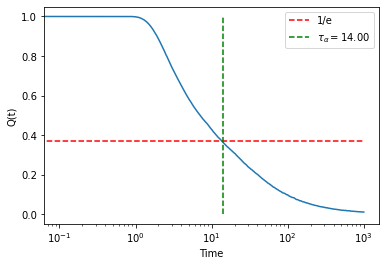

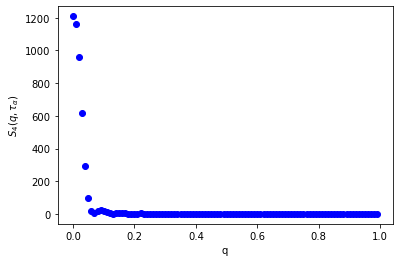

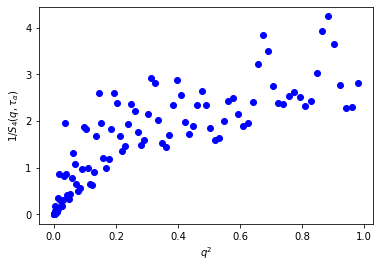

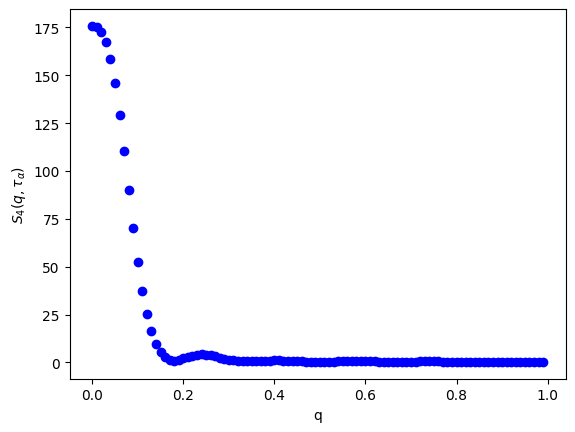

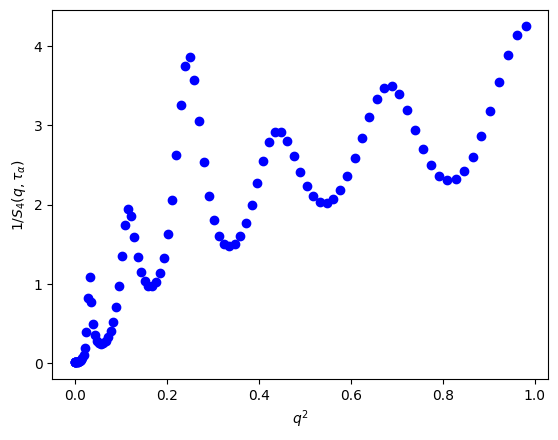

In [2]:
# Ns = [100, 144, 196, 256, 324, 400, 625, 1444]
# disps = get_all_data_npy(rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
# disps = get_all_data_npy(rf"Different_v0_Ens=100/Pin=0/Data/coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
T_alpha_results = {}
S4s_all = {}

for N in [10000]:
    # disps = get_all_data(rf"100_Ensemble\N={N}_pin=0\N={N}\coordinate_p0=3.80_v0=0.50_pin=0_set_", False, 10)
    disps = get_all_data_npy(rf"../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_", False, 10)
    Q_t_avg = np.zeros(len(disps[1][0]), dtype=np.complex128)
    for i in disps.keys():
        timestamps, arrs, N = disps[i]
        Q_t_avg +=Q_t(arrs, arrs[0])
    Q_t_avg /= len(disps.keys())
    T_alpha_ind = np.where(np.abs(Q_t_avg) < 1/np.e)[0][0]
    T_alpha = timestamps[T_alpha_ind]
    
    T_alpha_results[N] = T_alpha_ind

    print(T_alpha_ind, T_alpha)

    plt.plot(timestamps, np.abs(Q_t_avg))
    plt.xscale('log')
    plt.xlabel("Time")
    plt.ylabel("Q(t)")
    plt.hlines(1/np.e, colors='r', linestyles='dashed', label = '1/e', xmin = timestamps[0], xmax = timestamps[-1])
    plt.vlines(T_alpha, ymin=0, ymax=1, colors='g', linestyles='dashed', label = r"$\tau_{\alpha} = $" + f"{T_alpha:.2f}")
    plt.legend()

    plt.show()

    
    
    S4s = {}    
    for q in np.arange(0, 1, 0.01):
        # print(q)
        S4s[q] = S4(q, disps)
    S4s_all[N] = S4s
    
    
    
    # for q in S4s.keys():
    #     plt.plot(timestamps, np.abs(S4s[q]), label = f"q= {q:.2f}")
    # plt.legend()
    # plt.title(f"N={N}")
    # plt.xlabel("Time")
    # plt.ylabel(r"$S_4(q,t)$")
    # plt.xscale('log')
    # plt.show()
    
    
    for q in S4s.keys():
        plt.plot(q, np.abs(S4s[q][T_alpha_ind]), 'o', c = 'b')
    plt.xlabel("q")
    plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
    plt.show()
    
    
    for q in S4s.keys():
        plt.plot(q**2, 1/np.abs(S4s[q][T_alpha_ind]), 'o', c = 'b')
    plt.xlabel(r"$q^2$")
    plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
    plt.show()

In [39]:
from scipy.signal import find_peaks

S4_all_minima = {}
for N in S4s_all.keys():
    #find the local minima in S4[q][T_alpha_ind], and the corresponding q values
    S4s = S4s_all[N]
    T_alpha_ind = T_alpha_results[N]
    q_values = np.array(list(S4s.keys()))
    S4_values = np.array([np.abs(S4s[q][T_alpha_ind]) for q in q_values])

    minima_indices = find_peaks(-1/S4_values)[0]
    S4_all_minima[N] = (q_values[minima_indices], S4_values[minima_indices])

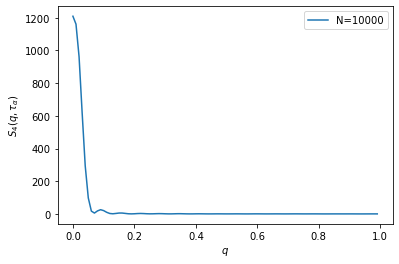

In [3]:
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q][T_alpha_results[N]]) for q in qs])
    plt.plot(qs, S4_q_alpha,  label = f"N={N}")
plt.xlabel(r"$q$")
plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
plt.legend()
plt.show()

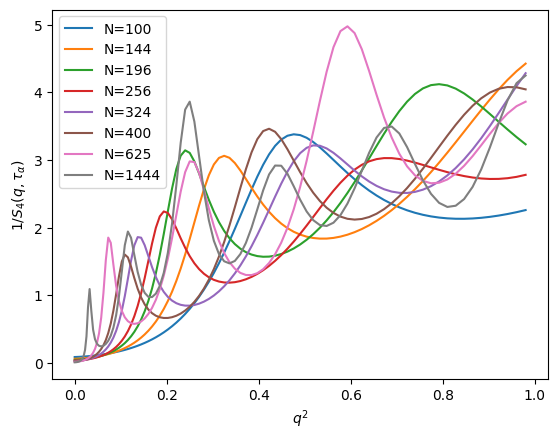

1


In [6]:
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q][T_alpha_results[N]]) for q in qs])
    plt.plot(qs**2, 1/S4_q_alpha, label = f"N={N}")
plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
plt.legend()
plt.show()
print(1)

N=100: slope=3.260753, intercept=0.203134, R²=0.666505, RMS deviation=0.681189
N=144: slope=3.954416, intercept=0.155570, R²=0.806957, RMS deviation=0.571204
N=196: slope=4.261995, intercept=0.232169, R²=0.803023, RMS deviation=0.623395
N=256: slope=3.369371, intercept=0.260905, R²=0.822884, RMS deviation=0.461653
N=324: slope=3.881297, intercept=0.216860, R²=0.859919, RMS deviation=0.462642
N=400: slope=4.047369, intercept=0.240251, R²=0.830701, RMS deviation=0.539615
N=625: slope=4.053403, intercept=0.437051, R²=0.696793, RMS deviation=0.789668
N=1444: slope=3.373533, intercept=0.607155, R²=0.673293, RMS deviation=0.694015


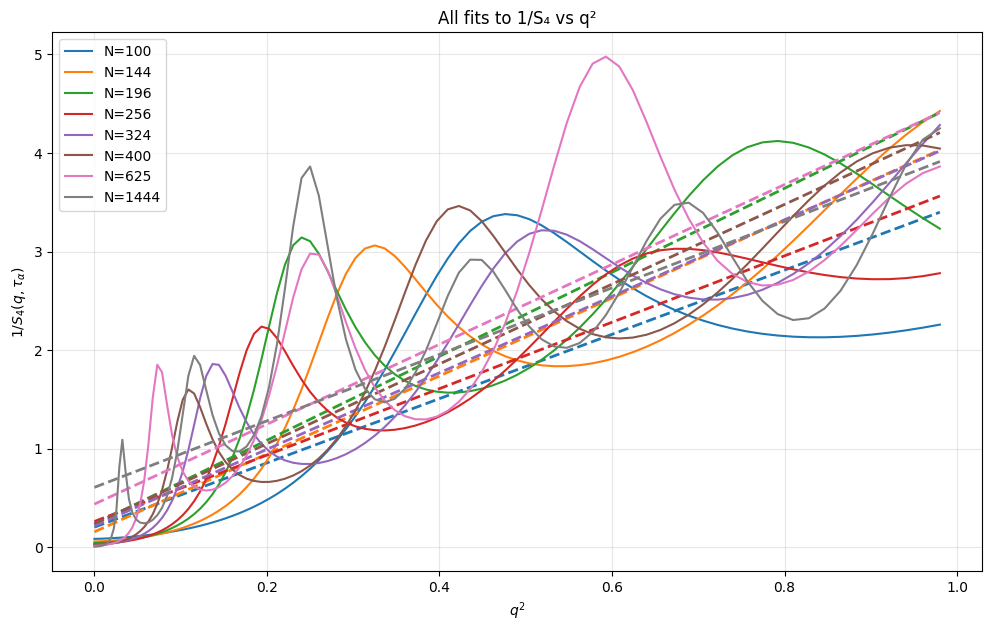

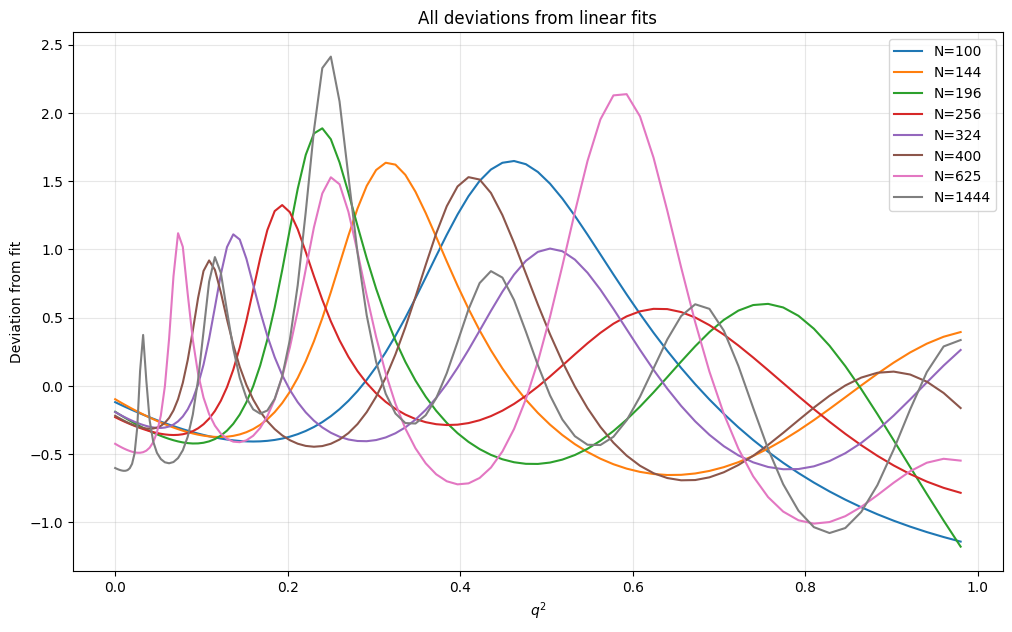

In [50]:
from scipy import stats

# Collect fit data for all N values
fit_data = {}

for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q][T_alpha_results[N]]) for q in qs]) + 0.0001        
    
    # Fit a line to the 1/S4_q_alpha vs q^2 data
    y_data = 1/S4_q_alpha
    x_data = qs**2
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    fit_line = slope * x_data + intercept
    
    # Calculate deviations and RMS deviation
    deviations = y_data - fit_line
    rms_deviation = np.sqrt(np.mean(deviations**2))
    
    print(f"N={N}: slope={slope:.6f}, intercept={intercept:.6f}, R²={r_value**2:.6f}, RMS deviation={rms_deviation:.6f}")
    
    fit_data[N] = {
        'x_data': x_data,
        'y_data': y_data,
        'fit_line': fit_line,
        'deviations': deviations,
        'slope': slope,
        'intercept': intercept,
        'rms_deviation': rms_deviation
    }

# Plot all data with fitted lines
plt.figure(figsize=(12, 7))
i=0
for N in S4s_all.keys():
    data = fit_data[N]
    #make both the same colour
    
    plt.plot(data['x_data'], data['y_data'],  label=f"N={N}", markersize=4, c = f"C{i}")
    plt.plot(data['x_data'], data['fit_line'], '--', linewidth=2, c=f"C{i}")
    i+=1

plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("All fits to 1/S₄ vs q²")
plt.show()

# Plot all deviations from fits
plt.figure(figsize=(12, 7))
for N in S4s_all.keys():
    data = fit_data[N]
    plt.plot(data['x_data'], data['deviations'],  label=f"N={N}", markersize=4)

plt.xlabel(r"$q^2$")
plt.ylabel(r"Deviation from fit")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("All deviations from linear fits")
plt.show()


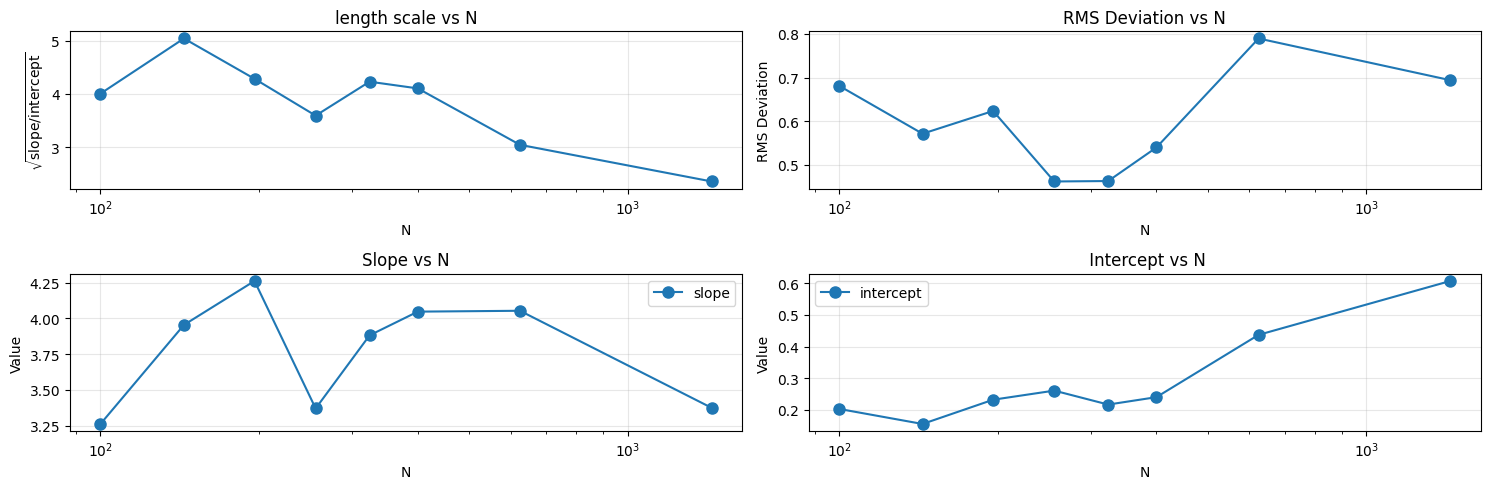

In [51]:
# Extract fit parameters for plotting vs N
Ns_sorted = sorted(fit_data.keys())
slopes = np.array([fit_data[N]['slope'] for N in Ns_sorted])
intercepts = np.array([fit_data[N]['intercept'] for N in Ns_sorted])
rms_deviations = [fit_data[N]['rms_deviation'] for N in Ns_sorted]

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Plot length scale vs N
axes[0][0].plot(Ns_sorted, np.sqrt(slopes/intercepts), 'o-', markersize=8)
axes[0][0].set_xlabel("N")
axes[0][0].set_ylabel("$\sqrt{\\text{slope}/\\text{intercept}}$")
axes[0][0].set_xscale('log')
axes[0][0].grid(True, alpha=0.3)
axes[0][0].set_title("length scale vs N")


# Plot RMS deviation vs N
axes[0][1].plot(Ns_sorted, rms_deviations, 'o-', markersize=8)
axes[0][1].set_xlabel("N")
axes[0][1].set_ylabel("RMS Deviation")
axes[0][1].set_xscale('log')
axes[0][1].grid(True, alpha=0.3)
axes[0][1].set_title("RMS Deviation vs N")


#plot slope vs N
axes[1][0].plot(Ns_sorted, slopes, 'o-', markersize=8, label='slope')
axes[1][0].set_xlabel("N")
axes[1][0].set_ylabel("Value")
axes[1][0].set_xscale('log')
axes[1][0].grid(True, alpha=0.3)
axes[1][0].set_title("Slope vs N")
axes[1][0].legend()


#plot intercept vs N
axes[1][1].plot(Ns_sorted, intercepts, 'o-', markersize=8, label='intercept')
axes[1][1].set_xlabel("N")
axes[1][1].set_ylabel("Value")
axes[1][1].set_xscale('log')
axes[1][1].grid(True, alpha=0.3)
axes[1][1].set_title(" Intercept vs N")
axes[1][1].legend()

plt.tight_layout()
plt.show()


100 [0.8464] [2.13029861]
144 [0.5329] [1.83667747]
196 [0.4096] [1.56819404]
256 [0.3364 0.9025] [1.18461454 2.71975586]
N=256: slope=2.711785, intercept=0.272370, R²=1.000000, RMS deviation=0.000000
324 [0.25   0.7225] [0.84430916 2.51277083]
N=324: slope=3.531136, intercept=-0.038475, R²=1.000000, RMS deviation=0.000000
400 [0.1936 0.6084] [0.66187743 2.11840155]
N=400: slope=3.511389, intercept=-0.017927, R²=1.000000, RMS deviation=0.000000
625 [0.1296 0.3844 0.7744] [0.57482425 1.29693593 2.65612485]
N=625: slope=3.249261, intercept=0.113846, R²=0.997038, RMS deviation=0.046957
1444 [0.0576 0.1681 0.3364 0.5476 0.81  ] [0.2420127  0.97135104 1.47009248 2.02376778 2.30556929]
N=1444: slope=2.626098, intercept=0.394294, R²=0.915734, RMS deviation=0.214839


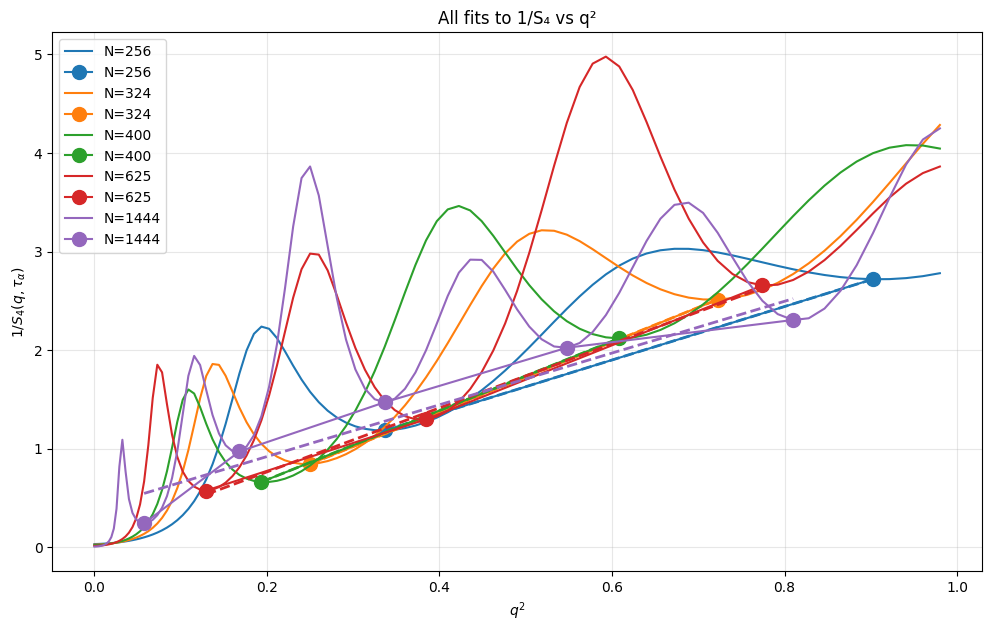

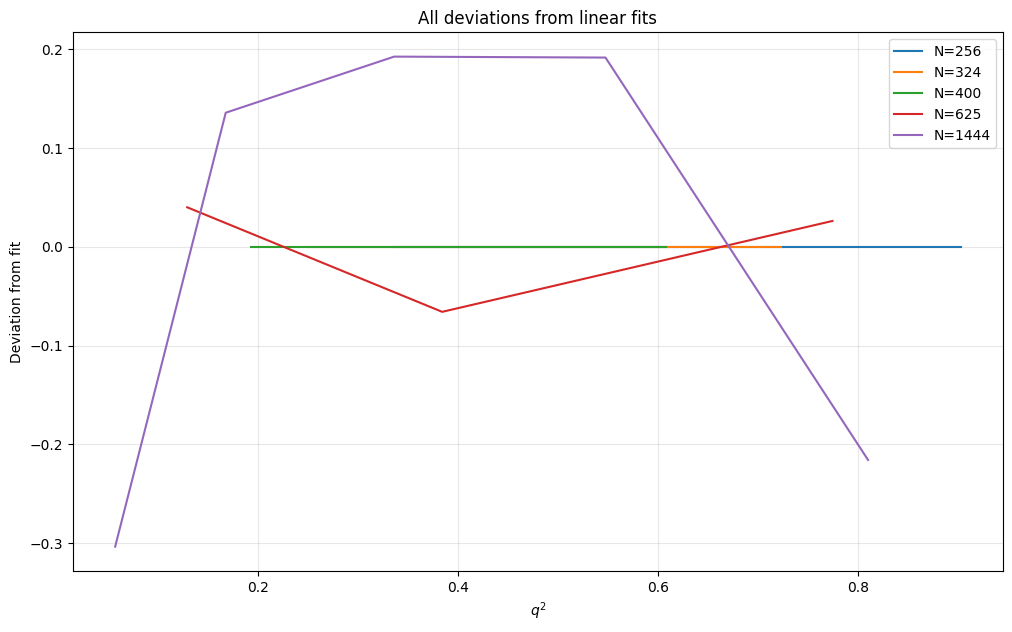

In [64]:
from scipy import stats

# Collect fit data for all N values
fit_data_minima = {}

for N in S4s_all.keys():
    qs, S4s = S4_all_minima[N]
    print(N, qs**2, 1/S4s)
    mask = qs>0.2
    qs = qs[mask]
    S4s = S4s[mask]       
    
    if(len(qs)<2):
        continue
    
    # Fit a line to the 1/S4_q_alpha vs q^2 data
    y_data = 1/S4s
    x_data = qs**2
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
    fit_line = slope * x_data + intercept
    
    # Calculate deviations and RMS deviation
    deviations = y_data - fit_line
    rms_deviation = np.sqrt(np.mean(deviations**2))
    
    print(f"N={N}: slope={slope:.6f}, intercept={intercept:.6f}, R²={r_value**2:.6f}, RMS deviation={rms_deviation:.6f}")
    
    fit_data_minima[N] = {
        'x_data': x_data,
        'y_data': y_data,
        'fit_line': fit_line,
        'deviations': deviations,
        'slope': slope,
        'intercept': intercept,
        'rms_deviation': rms_deviation
    }

# Plot all data with fitted lines
plt.figure(figsize=(12, 7))
i=0
for N in fit_data_minima.keys():
    data = fit_data_minima[N]
    #make both the same colour
    plt.plot(fit_data[N]['x_data'], fit_data[N]['y_data'],  label=f"N={N}", markersize=4, c = f"C{i}")
    plt.plot(data['x_data'], data['y_data'], "-o" , label=f"N={N}", markersize=10, c = f"C{i}")
    plt.plot(data['x_data'], data['fit_line'], '--', linewidth=2, c=f"C{i}")
    i+=1

plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("All fits to 1/S₄ vs q²")
plt.show()

# Plot all deviations from fits
plt.figure(figsize=(12, 7))
for N in fit_data_minima.keys():
    data = fit_data_minima[N]
    plt.plot(data['x_data'], data['deviations'],  label=f"N={N}", markersize=4)

plt.xlabel(r"$q^2$")
plt.ylabel(r"Deviation from fit")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("All deviations from linear fits")
plt.show()


C:\Users\Aadyot\AppData\Local\Temp\ipykernel_10564\2205833079.py:11: RuntimeWarning: invalid value encountered in sqrt
  axes[0][0].plot(Ns_sorted, np.sqrt(slopes/intercepts), 'o-', markersize=8)


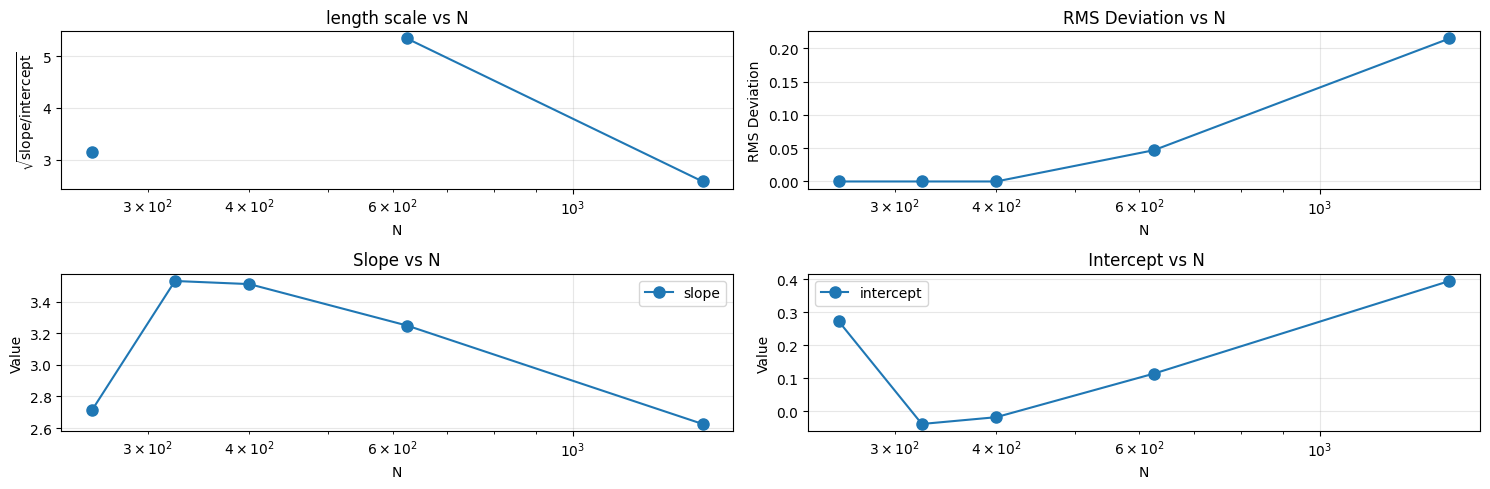

In [61]:
# Extract fit parameters for plotting vs N
Ns_sorted = sorted(fit_data_minima.keys())
slopes = np.array([fit_data_minima[N]['slope'] for N in Ns_sorted])
intercepts = np.array([fit_data_minima[N]['intercept'] for N in Ns_sorted])
rms_deviations = [fit_data_minima[N]['rms_deviation'] for N in Ns_sorted]

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Plot length scale vs N
axes[0][0].plot(Ns_sorted, np.sqrt(slopes/intercepts), 'o-', markersize=8)
axes[0][0].set_xlabel("N")
axes[0][0].set_ylabel("$\sqrt{\\text{slope}/\\text{intercept}}$")
axes[0][0].set_xscale('log')
axes[0][0].grid(True, alpha=0.3)
axes[0][0].set_title("length scale vs N")


# Plot RMS deviation vs N
axes[0][1].plot(Ns_sorted, rms_deviations, 'o-', markersize=8)
axes[0][1].set_xlabel("N")
axes[0][1].set_ylabel("RMS Deviation")
axes[0][1].set_xscale('log')
axes[0][1].grid(True, alpha=0.3)
axes[0][1].set_title("RMS Deviation vs N")


#plot slope vs N
axes[1][0].plot(Ns_sorted, slopes, 'o-', markersize=8, label='slope')
axes[1][0].set_xlabel("N")
axes[1][0].set_ylabel("Value")
axes[1][0].set_xscale('log')
axes[1][0].grid(True, alpha=0.3)
axes[1][0].set_title("Slope vs N")
axes[1][0].legend()


#plot intercept vs N
axes[1][1].plot(Ns_sorted, intercepts, 'o-', markersize=8, label='intercept')
axes[1][1].set_xlabel("N")
axes[1][1].set_ylabel("Value")
axes[1][1].set_xscale('log')
axes[1][1].grid(True, alpha=0.3)
axes[1][1].set_title(" Intercept vs N")
axes[1][1].legend()

plt.tight_layout()
plt.show()
